In [1]:
import random
import pathlib

import matplotlib.pyplot as plt

import config
from model import losses
# from utils import callbacks
from train import make_datasets, compile_model, get_callbacks

In [3]:
pathlist = config.TR_MAP_PATH.glob("*.png")
pathlist = [path.name for path in pathlist]
random.shuffle(pathlist)

# テストのため1/4のデータでやってみる
nb_tr = int(len(pathlist) * 0.2)
nb_va = int(len(pathlist) * 0.1)
tr_pathlist = pathlist[:nb_tr]
va_pathlist = pathlist[nb_tr:]

train_ds, valid_ds = make_datasets(
    ds_root=pathlib.Path("/mass_roads/train/"),
    tr_path=tr_pathlist,
    va_path=va_pathlist,
    use_cutmix=False,
    # nbmix=2,
)


(64, 256, 256, 3)
(64, 256, 256, 1)


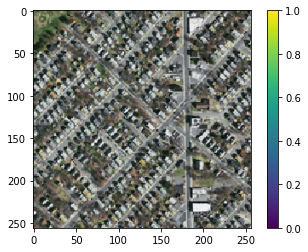

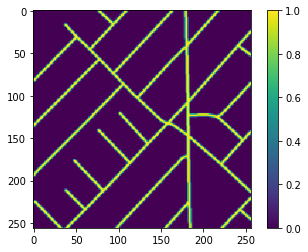

In [4]:
for i,t in train_ds.take(1):
    print(i.shape)
    print(t.shape)
    plt.imshow(i[0])
    plt.colorbar()
    plt.show()
    plt.imshow(t[0])
    plt.colorbar()
    plt.show()

In [18]:
# loss = losses.TverskyLoss(name="Tversky", alpha=0.7)
loss = losses.DICELoss(name="DICE")
model = compile_model(
    loss=loss,
    # xception=True,
)


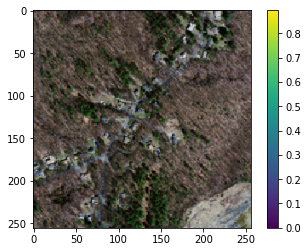

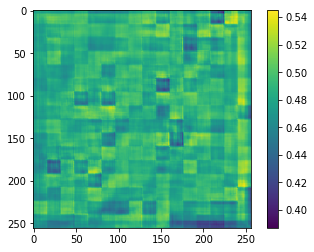

In [14]:
i, t = next(iter(train_ds))
pred = model.predict(i)
pred.shape
plt.imshow(i[0])
plt.colorbar()
plt.show()
plt.imshow(pred[0])
plt.colorbar()
plt.show()

In [19]:
model.dtype

'float32'

In [15]:
## 訓練
filename = "augument_test"
model_history = model.fit(
    train_ds,
    epochs=2,
    validation_data=valid_ds,
    steps_per_epoch=config.STEPS_PER_EPOCH,
    validation_steps=5,
    # callbacks=get_callbacks(filename),
)


Epoch 1/2


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted:  OOM when allocating tensor with shape[64,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_4/conv2d_39/Conv2D/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[confusion_matrix/assert_less/Assert/AssertGuard/pivot_f/_21/_49]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) Resource exhausted:  OOM when allocating tensor with shape[64,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_4/conv2d_39/Conv2D/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_15825]

Function call stack:
train_function -> train_function


In [ ]:
print(model_history.history.keys())
tr_loss = model_history.history["loss"]
va_loss = model_history.history["val_loss"]
tr_iou = model_history.history["mean_io_u"]
va_iou = model_history.history["val_mean_io_u"]

plt.figure()
plt.title("mean IoU")
plt.plot(tr_iou, "r")
plt.plot(va_iou, "bo")
plt.show()

plt.title("loss")
plt.plot(tr_loss, "r")
plt.plot(va_loss, "bo")
plt.show()


In [ ]:
for i,t in valid_ds.take(3):
    pred = model.predict(i)
    plt.imshow(i[0])
    plt.show()
    plt.imshow(t[0])
    plt.show()
    plt.imshow(pred[0])
    plt.show()